# Ejemplo Pre- and procesamiento: Señales de Voz

## Procesamiento Digital de Señales-UdeA
### Paula Andrea Pérez Toro

In [1]:

import scipy
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import numpy as np
import matplotlib.pyplot as plt # libreria usada para graficas
from sklearn import preprocessing


### Lectura de la señal

Voz de Hombre

In [2]:
file_audio=('./voz.wav') # Ruta del archivo con la senal
fs1, audio_input1=read(file_audio) # Cargar el archivo
Audio(audio_input1,rate=fs1)

Voz de Mujer

In [3]:
file_audio=('./voz_mujer.wav') # Ruta del archivo con la senal
fs2, audio_input2=read(file_audio) # Cargar el archivo
Audio(audio_input2,rate=fs2)

#### Revisar las frecuencias de muestreo

##### Primero vamos a sacar datos basicos de la señal


In [5]:
print('Numero de muestras Audio Hombre: {} Audio Mujer: {}'.format(len(audio_input1),len(audio_input2) ))


Numero de muestras Audio Hombre: 632272 Audio Mujer: 212570


In [6]:
print('Frecuencia de muestreo Audio Hombre: {} Hz Audio Mujer: {} Hz'.format(fs1, fs2))


Frecuencia de muestreo Audio Hombre: 44100 Hz Audio Mujer: 22050 Hz


In [7]:
print('Longitud en tiempo Audio Hombre: {} seg Audio Mujer: {} seg'.format(float(len(audio_input1))/fs1,float(len(audio_input2))/fs2)) 


Longitud en tiempo Audio Hombre: 14.337233560090702 seg Audio Mujer: 9.640362811791384 seg


##### Sub-Muestreo o up-sampling


Igual frecuencia de muestreo. Optamos por 16000


Audio Hombre 


In [8]:
fs=16000

muestra_H= int(len ( audio_input1 ) * fs /fs1)
muestra_H

229395

In [10]:
from  scipy.signal  import  resample
import  numpy  as np


In [11]:
audio_input1 = resample(audio_input1 ,muestra_H)
Audio(audio_input1,rate=fs)

Audio Mujer 


In [12]:
fs=16000

muestra_M= int(len ( audio_input2 ) * fs /fs2)
muestra_M

154245

In [13]:
audio_input2 = resample(audio_input2 ,muestra_M)
Audio(audio_input2,rate=fs)

In [14]:
audio_input_t = resample(audio_input2 ,muestra_M//2)
Audio(audio_input_t,rate=fs//2)

In [15]:
audio_input_t = resample(audio_input1 ,muestra_H//2)
Audio(audio_input_t,rate=fs//2)

####  Normalización vs Estadarización

In [19]:
#Estandarización
scaler = preprocessing.StandardScaler()
standar_X = scaler.fit_transform(np.vstack(audio_input1))

standar_X = scaler.fit(np.vstack(audio_input1))
standar_X = scaler.transform(np.vstack(audio_input1))


x_original=audio_input1

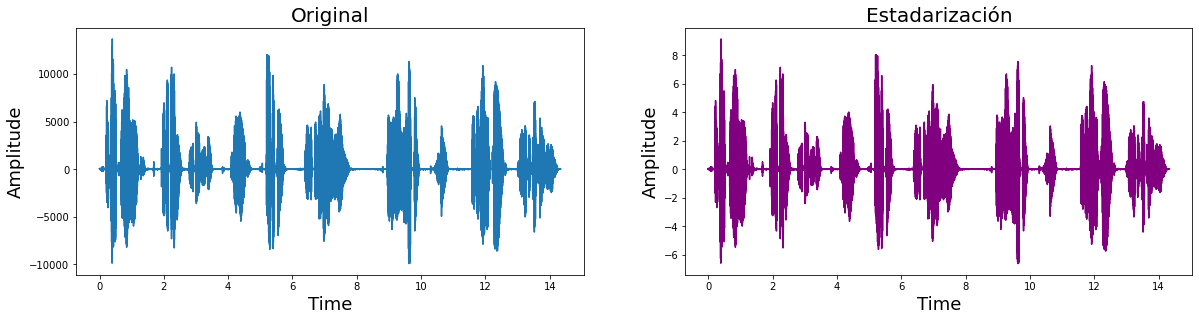

In [22]:
#Graficar y escuchar

t=np.arange(0, float(len(x_original))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,audio_input1) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)

plt.subplot(2,2,2)

plt.plot(t,standar_X,c='purple') # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Estadarización',fontsize=20)

plt.show() # Mostrar la grafica
Audio(audio_input1, rate=fs) # para escuchar la senal, si se desea


In [24]:
#Normalizacion
scaler = preprocessing.MinMaxScaler()
norm_X = scaler.fit_transform(np.vstack(audio_input1))

norm_X = scaler.fit(np.vstack(audio_input1))

norm_X = scaler.transform(np.vstack(audio_input1))

x_original=audio_input1

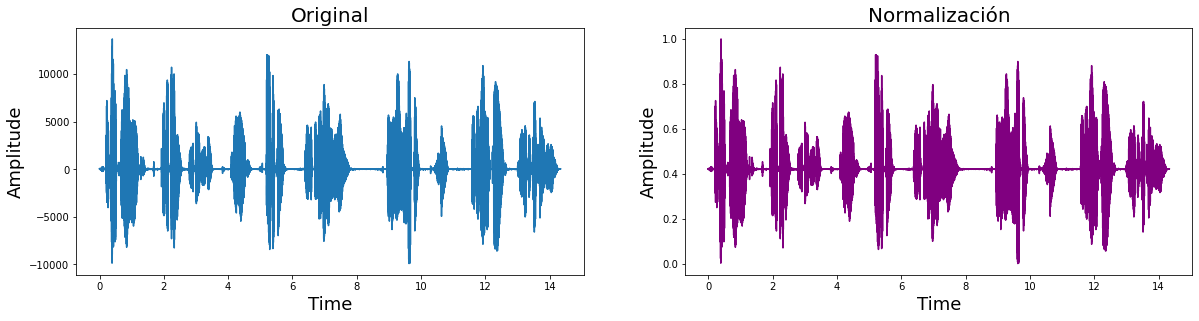

In [25]:
#Graficar y escuchar

t=np.arange(0, float(len(x_original))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,audio_input1) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)

plt.subplot(2,2,2)

plt.plot(t,norm_X,c='purple') # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Normalización',fontsize=20)

plt.show() # Mostrar la grafica
Audio(x_original, rate=fs) # para escuchar la senal, si se desea


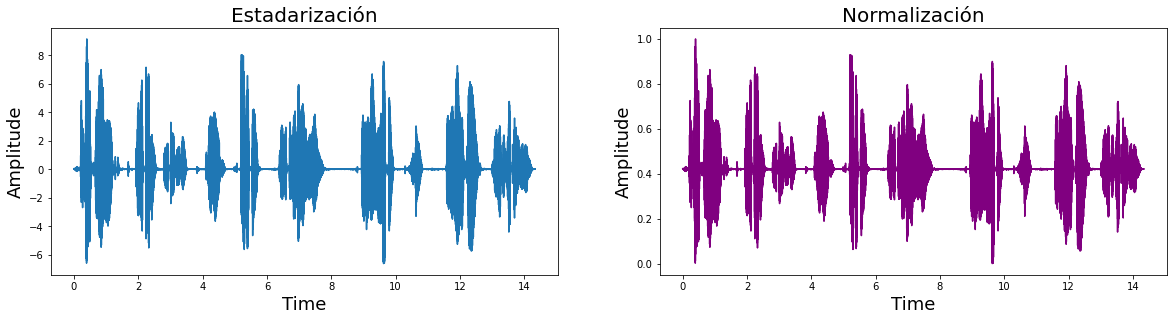

In [26]:
#Graficar y escuchar

t=np.arange(0, float(len(x_original))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,standar_X) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Estadarización',fontsize=20)

plt.subplot(2,2,2)

plt.plot(t,norm_X,c='purple') # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Normalización',fontsize=20)

plt.show() # Mostrar la grafica
Audio(x_original, rate=fs) # para escuchar la senal, si se desea


#### Segundo Audio

In [27]:
#Normalizacion
scaler = preprocessing.MinMaxScaler()
norm_X2 = scaler.fit_transform(np.vstack(audio_input2))
x_original=audio_input2

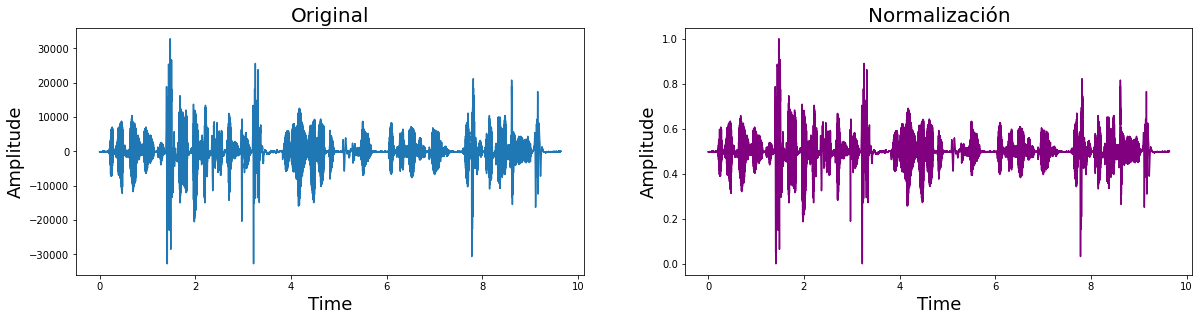

In [28]:
#Graficar y escuchar

t=np.arange(0, float(len(x_original))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,audio_input2) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Original',fontsize=20)

plt.subplot(2,2,2)

plt.plot(t,norm_X2,c='purple') # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Normalización',fontsize=20)

plt.show() # Mostrar la grafica
Audio(x_original, rate=fs) # para escuchar la senal, si se desea


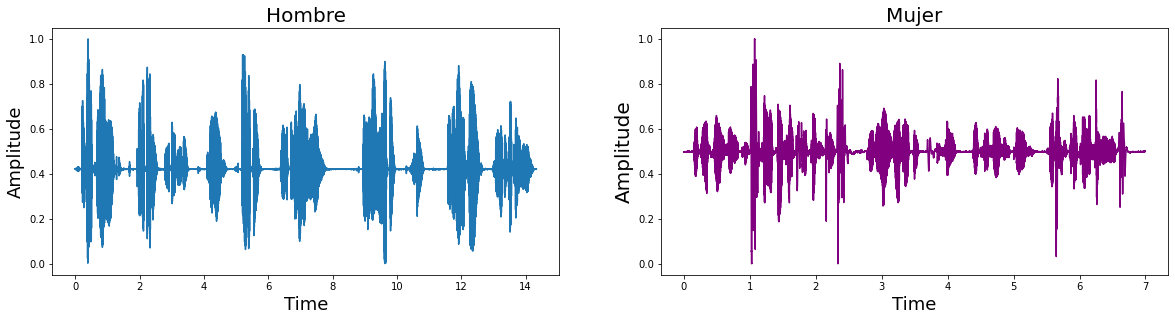

In [29]:
#Graficar y escuchar

t=np.arange(0, float(len(norm_X))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(t,norm_X) # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.title('Hombre',fontsize=20)

plt.subplot(2,2,2)
t=np.arange(0, float(len(norm_X2))/fs2, 1.0/fs2) # Vector de tiempo

plt.plot(t,norm_X2,c='purple') # Dibujar la grafica
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=20)
plt.title('Mujer',fontsize=20)


plt.show() # Mostrar la grafica

### Enventanado

In [30]:
def extract_windows(signal, size, step):
    # make sure we have a mono signal
    assert(signal.ndim == 1)

   
    n_frames = int((len(signal) - size) / step)
   
    # extract frames
    windows = [signal[i * step : i * step + size]
               for i in range(n_frames)]
   
    # stack (each row is a window)
    return np.vstack(windows)

Calcular cuanto es 40 ms y 10 ms en muestras

$$40msMuestras=0.040*fs $$ $$10msMuestras=0.010*fs $$

In [32]:
size=int(0.040*fs)
step=int(0.10*fs)


Audio Hombre

In [33]:
audio_input1=audio_input1/max(audio_input1)

In [34]:
frames_1=extract_windows(np.hstack(audio_input1), size, step)
len(frames_1)

142

Audio Mujer

In [35]:
audio_input2=audio_input2/max(audio_input2)

In [36]:
frames_2=extract_windows(np.hstack(audio_input2), size, step)
len(frames_2)

96

#### Añadir ventana Hamming
 Reducir discontinuidades

In [37]:
win_size = int(0.04*fs)


Audio Hombre

In [39]:
frames_ham_1 = frames_1*np.hamming(win_size)

Audio Mujer

In [40]:
frames_ham_2 = frames_2*np.hamming(win_size)

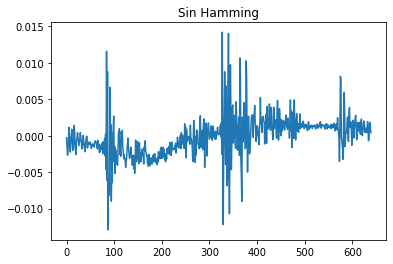

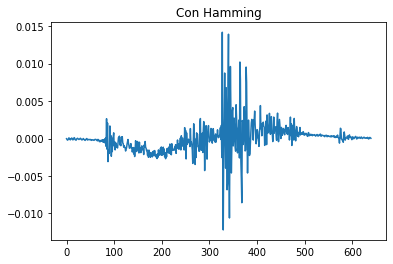

In [41]:
plt.title('Sin Hamming')
plt.plot(frames_1[1])
plt.show()
plt.title('Con Hamming')

plt.plot(frames_ham_1[1])
plt.show()

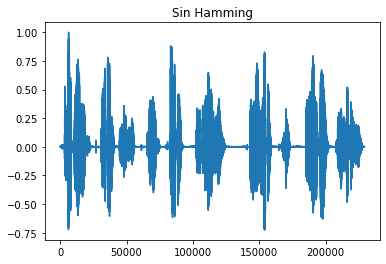

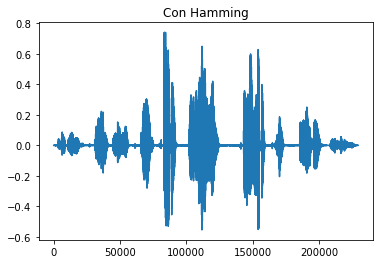

In [45]:
frames_t = audio_input1*np.hamming(len(audio_input1))
plt.title('Sin Hamming')
plt.plot(audio_input1)
plt.show()
plt.title('Con Hamming')

plt.plot(frames_t)
plt.show()
Audio(frames_t,rate=fs)

#### Energía

In [46]:
import scipy.integrate as integrate

$$  E=\int _{-\infty} ^{\infty} x^{2}(t)\,dt $$

Calcularemos la energia por cada ventana y la guardaremos

In [47]:
def energy_computing(frames,fs):
    energia=[]
    for fr in frames:

        #Cuadrado de la señal
        x2 = fr**2

        #t

        t=np.arange(0, float(len(fr))/fs, 1.0/fs) # Vector de tiempo

        #integral
        energia.append(integrate.simps(x2,t))
    
    return energia

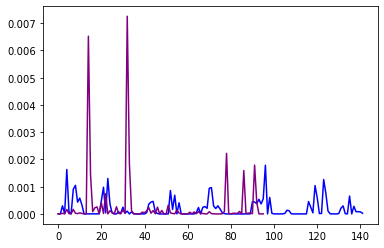

In [48]:
#Energia Hombre
energia_H=energy_computing(frames_ham_1,fs)
plt.plot(energia_H, color='blue')
#Energia Mujer

energia_M=energy_computing(frames_ham_2,fs)
plt.plot(energia_M, color='purple')


Como caracteristica estatica podemos obtener diferentes estadisticos como: media, desviación estandar, Skewness, kurtosis

Hombre

In [49]:
media_energia_H=np.mean(energia_H)
std_energia_H=np.std(energia_H)

print('Media',media_energia_H, 'STD', std_energia_H)

Media 0.00019861627058274502 STD 0.0003405044429494917


Mujer

In [50]:
media_energia_M=np.mean(energia_M)
std_energia_M=np.std(energia_M)

print('Media',media_energia_M, 'STD', std_energia_M)

Media 0.0002946888056518291 STD 0.0010433406156628393


### Tasa de cruce por cero


Las veces que cambia de negativo a positivo y viceversa, esto significa que pasa por cero

In [51]:
def cruce_cero(frames):
    zcr = []
    for fr in frames:
        zcr.append((np.diff(np.sign(fr)) != 0).sum()/float(len(fr)))
    zcr=np.array(zcr)
    return zcr


[0.        0.00625   0.0921875 0.0375    0.13125   0.0546875 0.03125
 0.16875   0.15625   0.0484375 0.10625   0.09375   0.0765625 0.04375
 0.0140625 0.0078125 0.0296875 0.178125  0.1875    0.0140625 0.1234375
 0.3765625 0.0546875 0.03125   0.003125  0.1625    0.0265625 0.1046875
 0.05625   0.01875   0.0015625 0.0453125 0.00625   0.0078125 0.00625
 0.        0.09375   0.0046875 0.0171875 0.2359375 0.1546875 0.175
 0.1125    0.1359375 0.1875    0.084375  0.090625  0.05625   0.0890625
 0.0703125 0.        0.003125  0.00625   0.0953125 0.6625    0.1171875
 0.1125    0.053125  0.        0.        0.        0.0828125 0.5859375
 0.08125   0.64375   0.18125   0.06875   0.084375  0.1125    0.2078125
 0.1140625 0.0734375 0.5828125 0.1       0.        0.        0.0234375
 0.0890625 0.00625   0.265625  0.003125  0.375     0.046875  0.14375
 0.159375  0.3390625 0.0125    0.090625  0.1640625 0.0609375 0.0625
 0.003125  0.0015625 0.        0.        0.       ]


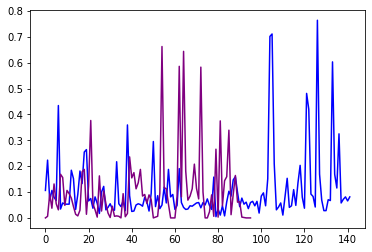

In [52]:
# Hombre
zcr_H=cruce_cero(frames_ham_1)
plt.plot(zcr_H, color='blue')
# Mujer

zcr_M=cruce_cero(frames_ham_2)
plt.plot(zcr_M, color='purple')

print(zcr_M)


In [53]:
#hombre
media_zcr_H=np.mean(zcr_H)
std_zcr_H=np.std(zcr_H)

print('Media',media_zcr_H, 'STD', std_zcr_H)

Media 0.10704225352112678 STD 0.12920546479113595


In [54]:
#Mujer


In [56]:
media_zcr_M=np.mean(zcr_M)
std_zcr_M=np.std(zcr_M)

print('Media',media_zcr_M, 'STD', std_zcr_M)

Media 0.10236002604166666 STD 0.1346795458017144


Como caracteristica estatica podemos obtener diferentes estadisticos como: media, desviación estandar, Skewness, kurtosis

#### Espectrogramas

In [57]:
def powerspec(X, rate, size, n_padded_min=0):
    
   
    # hanning window
    X *= np.hanning(size)
    
   
    # zero padding to next power of 2
    if n_padded_min==0:
        n_padded = max(n_padded_min, int(2 ** np.ceil(np.log(size) / np.log(2))))
    else:
        n_padded = n_padded_min
        
    # Fourier transform
    Y = np.fft.fft(X, n=n_padded)
    Y = np.absolute(Y)
   
    # non-redundant part
    m = int(n_padded / 2) + 1
    Y = Y[:, :m]
   
    return Y ** 2, n_padded

Hombre

In [68]:
espectro,nfft=powerspec(np.vstack(frames_1),fs,size,1024)
#Para mejor visualizacion
spect_H=np.flipud(np.log(espectro).T)

In [72]:
espectro,nfft=powerspec(np.vstack(frames_2),fs,size,1024)
#Para mejor visualizacion
spect_M=np.flipud(np.log(espectro).T)

In [73]:
t1=int(len(audio_input1)/fs)
t2=int(len(audio_input2)/fs)

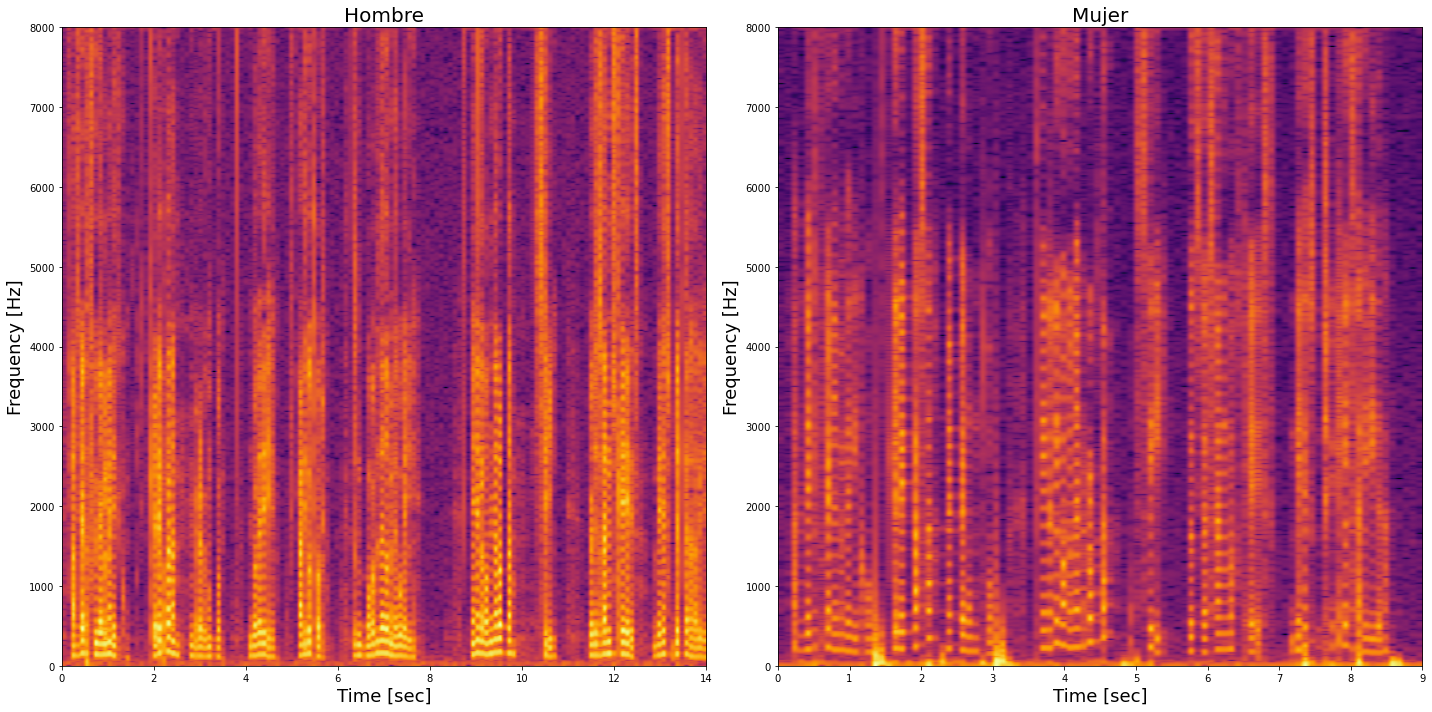

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Hombre', fontsize=20)
plt.imshow(spect_H, cmap='inferno', aspect='auto', extent=[0, t1, 0,  8000])
plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.subplot(122)
plt.title('Mujer', fontsize=20)

plt.imshow(spect_M, cmap='inferno', aspect='auto', extent=[0, t2, 0,  8000])

plt.ylabel('Frequency [Hz]', fontsize=18)
plt.xlabel('Time [sec]', fontsize=18)
plt.tight_layout()
plt.show()